<a href="https://colab.research.google.com/github/PALLITULASIRAM/task_8_k_means/blob/main/task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully ✅


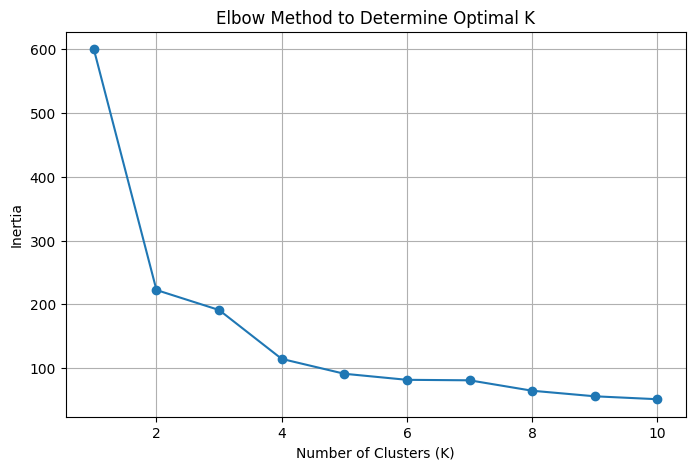


Silhouette Score: 0.480


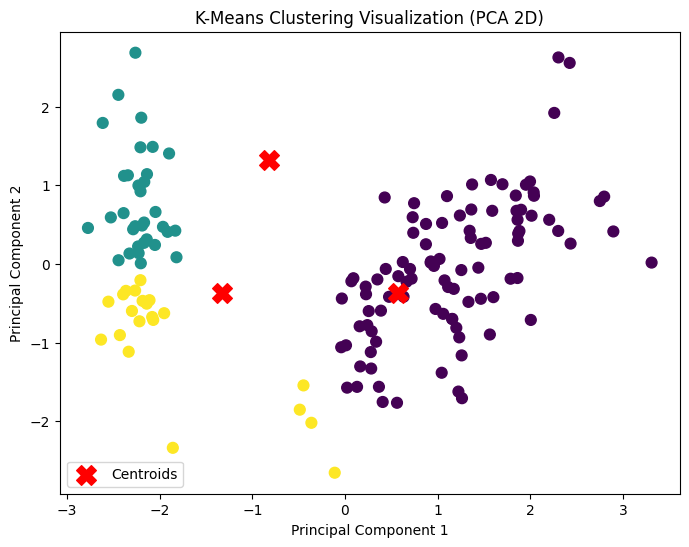


Cluster Means:
         sepal_length  sepal_width  petal_length  petal_width
Cluster                                                      
0            6.314583     2.895833      4.973958     1.703125
1            5.169697     3.630303      1.493939     0.272727
2            4.747619     2.895238      1.757143     0.352381

File saved as 'KMeans_Clustered_Data.csv'


In [1]:
# Task 8: K-Means Clustering (Fixed Version)
# -------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Load Dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
print("Dataset Loaded Successfully ✅")
df.head()

# Step 2: Data Preprocessing
numeric_data = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Step 3: Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Step 4: Train K-Means with optimal clusters (K=3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

# Step 5: Silhouette Score
score = silhouette_score(data_scaled, y_kmeans)
print(f"\nSilhouette Score: {score:.3f}")

# Step 6: PCA for 2D Visualization
pca = PCA(2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_kmeans, cmap='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering Visualization (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Step 7: Add Cluster Labels
df['Cluster'] = y_kmeans

# ✅ Step 8: Cluster Means (only for numeric columns)
cluster_means = df.groupby('Cluster')[numeric_data.columns].mean()
print("\nCluster Means:")
print(cluster_means)

# Step 9: Save results
df.to_csv("KMeans_Clustered_Data.csv", index=False)
print("\nFile saved as 'KMeans_Clustered_Data.csv'")
